# Setup
### Imports, wipe working directories, reload .py scripts

In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import importlib, os

from lib import path_tools as pt
from lib import import_data

%matplotlib inline

In [4]:
pt.wipe_scrap()

# Set the technique we're working with today
# Valid values: 'xrd', 'pl', 'uvvis'
flag = "uvvis"

In [5]:
importlib.reload(import_data);

## MAPbI Data Import

In [ ]:
# Identify the folder(s) where the raw, original data is
# Use a list to store multiple directories that you want ready to plot

# ETB-046 Variables
samples_dir_etb046 = "190904 ETB-046 MAPbI on glass FF/"
uv_data_dict_etb046 = import_data.init(flag, samples_dir_etb046)
cypher_etb046 = (
    "30sec",
    "1min",
    "2min",
    "3min",
    "5min",
    "20min",
)

# ETB-047 Variables
samples_dir_etb047 = "190902 ETB-047 MAPbI on glass FF/"
uv_data_dict_etb047 = import_data.init(flag, samples_dir_etb047)
cypher_etb047 = (
    "10min",
    "40min",
    "60min",
    "80min",
    "100min",
    "120min",
)

# ETB-048 Variables
samples_dir_etb048 = "190904 ETB-048 MAPbI on glass FF/"
uv_data_dict_etb048 = import_data.init(flag, samples_dir_etb048)
cypher_etb048 = (
    "4min",
    "15min",
)

## EDBE Data Import

***

### Data structure:

uv_data
 - Run ID (etb0XX)
     - Sample ID ('1min')
          - wavelength
          - counts

***

### Run -> Sample Correspondence
|ETB-043|ETB-044|
|---|---|
|20min|1min|
|40min|2min|
|60min|5min|
|80min|10min|
|100min|15min|
|120min|20min|

In [7]:
# Identify the folder(s) where the raw, original data is
# Use a dict to store multiple directories that you want ready to plot
uv_data = {}
samples_dir = {
    "etb043": "190709 ETB-043 EDBEPbBr on glass FF/",
    "etb044": "190716 ETB-044 EDBEPbBr on glass FF/",
}

for run_ID in samples_dir.keys():
    uv_data[run_ID] = import_data.init(flag, samples_dir[run_ID])



Sample data already in local memory, do you wish to wipe and pull from the master Box directory? y/n
y
Creating new local data folder.


In [19]:
# Expression to find where index = X nm for normalizing later
uv_data["etb044"]['1min'].index[uv_data["etb044"]['1min']['wavelength'] == 550]

Int64Index([250], dtype='int64')

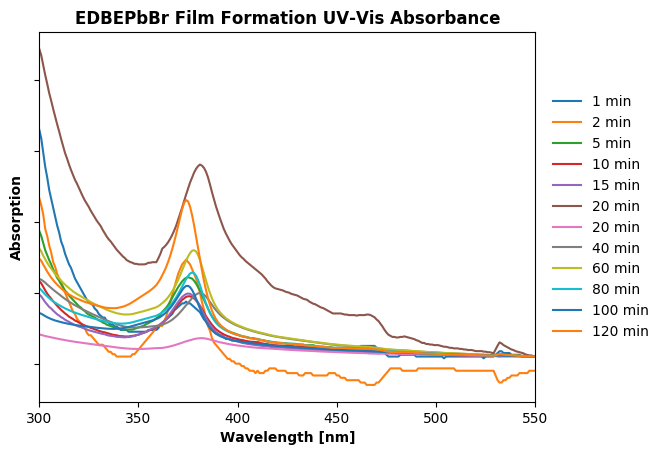

In [23]:
fig = plt.figure(1)
fig_ax = plt.gca()

# Comment out any undersired samples
master_cypher = (
#     "30sec",
    "1min",
    "2min",
#     "3min",
#     "4min",
    "5min",
    "10min",
    "15min",
    "20min",
    "40min",
    "60min",
    "80min",
    "100min",
    "120min",
)

# PUT THIS IN MAIN.PY LATER
# def sortsamples

for sample_ID in master_cypher:
    for run_ID in samples_dir.keys():
        if sample_ID in uv_data[run_ID].keys():
            plt.figure(1)
            plt.plot(uv_data[run_ID][sample_ID]["wavelength"], uv_data[run_ID][sample_ID]["abs"]/
                     abs(uv_data[run_ID][sample_ID]["abs"][250]),
                     label=sample_ID.replace("min", " min"))
        else:
            pass

plt.style.use('default')

plt.xlabel("Wavelength [nm]", weight="semibold")
plt.ylabel("Absorption", weight="semibold")
fig_ax.set_yticklabels([])
plt.xlim(min(uv_data["etb044"]["1min"]["wavelength"]), max(uv_data["etb044"]["1min"]["wavelength"]))

plt.title("EDBEPbBr Film Formation UV-Vis Absorbance",weight="semibold")
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0,.22,1), mode='expand', frameon=False)

In [24]:
fig.savefig("plots/190912/edbe_abs_all_norm.png", dpi=200, format='png', bbox_inches='tight')